In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model

drive.mount('/content/drive')

model_path = '/content/drive/MyDrive/Colab Notebooks/Estimation of LAI.hdf5'
model = load_model(model_path)

model.summary()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         125,445 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,840,135 (56.61 MB)

 Trainable params: 125,445 (490.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
image_paths = {
    "closeup-image": "",
    "uploaded_image": "/content/Screenshot 2024-11-29 200557.png",
    "reference_image": "/content/low-altitude-aerial-photo-maize-260nw-2511644875.webp",
    "dataset": "/content/Crop Production data.csv"
}

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

class_labels = ['Jute', 'Maize', 'Rice', 'Sugarcane', 'Wheat']

def predict_image(image_path):
    try:
        example_image = load_img(image_path, target_size=(224, 224))
        example_image_array = img_to_array(example_image) / 255.0
        example_image_array = np.expand_dims(example_image_array, axis=0)

        prediction = model.predict(example_image_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_label = class_labels[predicted_class]

        return predicted_label
    except Exception as e:
        print(f"Error in predicting image: {e}")


uploaded_image_path = image_paths["uploaded_image"]
predicted_crop = predict_image(uploaded_image_path)
print(f"Predicted Crop for the image : {predicted_crop}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
Predicted Crop for the image : Maize


In [ ]:
import numpy as np
import pandas as pd
import cv2
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def generate_synthetic_data():
    np.random.seed(42)
    data = {
        "NDVI": np.random.uniform(0.2, 0.9, 100),
        "EVI": np.random.uniform(0.1, 0.8, 100),
        "GNDVI": np.random.uniform(0.2, 0.9, 100),
        "RENDVI": np.random.uniform(0.2, 0.7, 100),
        "WDRVI": np.random.uniform(0.1, 0.6, 100),
        "CI": np.random.uniform(0.3, 1.0, 100),
        "NDRE": np.random.uniform(0.1, 0.7, 100),
        "LAI": np.random.uniform(0.5, 6.0, 100)
    }
    df = pd.DataFrame(data)
    return df

def calculate_vegetation_indices(image):
    image = image.astype(np.float32) / 255.0

    R = image[:, :, 2]
    G = image[:, :, 1]
    B = image[:, :, 0]

    NDVI = (R - G) / (R + G + 1e-6)
    EVI = 2.5 * (R - G) / (R + 6 * G - 7.5 * B + 1 + 1e-6)
    GNDVI = (G - R) / (G + R + 1e-6)
    RENDVI = (R - B) / (R + B + 1e-6)
    WDRVI = 0.1 * (R - G) / (R + G + 1e-6)
    CI = R / (G + 1e-6)
    NDRE = (R - B) / (R + B + 1e-6)

    indices = {
        "NDVI": np.mean(NDVI),
        "EVI": np.mean(EVI),
        "GNDVI": np.mean(GNDVI),
        "RENDVI": np.mean(RENDVI),
        "WDRVI": np.mean(WDRVI),
        "CI": np.mean(CI),
        "NDRE": np.mean(NDRE),
    }
    return indices

def evaluate_models(df):
    X = df[["NDVI", "EVI", "GNDVI", "RENDVI", "WDRVI", "CI", "NDRE"]]
    y = df["LAI"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0),
        "Lasso Regression": Lasso(alpha=0.01),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results[name] = {"MSE": mse, "RMSE": rmse, "R^2": r2}
        print(f"{name}: RMSE = {rmse:.4f}")

    return results, models

def predict_lai(image_path, model):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found. Please check the path.")

    indices = calculate_vegetation_indices(image)
    print("Extracted Vegetation Indices:", indices)

    feature_vector = np.array([indices[key] for key in ["NDVI", "EVI", "GNDVI", "RENDVI", "WDRVI", "CI", "NDRE"]]).reshape(1, -1)

    feature_vector_df = pd.DataFrame(
        feature_vector,
        columns=["NDVI", "EVI", "GNDVI", "RENDVI", "WDRVI", "CI", "NDRE"]
    )

    lai_prediction = model.predict(feature_vector_df)[0]

    if lai_prediction < 0 or lai_prediction > 6:
        raise ValueError(
            "The uploaded image is unable to predict LAI. Please provide a proper image."
        )

    print(f"Predicted LAI: {lai_prediction:.4f}")
    return lai_prediction

if __name__ == "__main__":
    synthetic_data = generate_synthetic_data()
    results, trained_models = evaluate_models(synthetic_data)

    best_model_name = max(results, key=lambda x: results[x]["R^2"])
    best_model = trained_models[best_model_name]
    print(f"Best Model: {best_model_name} with RMSE = {results[best_model_name]['RMSE']:.4f}")

    image_path = image_paths["uploaded_image"]
    try:
        lai = predict_lai(image_path, best_model)
        print(f"Final Predicted LAI using {best_model_name}: {lai:.4f}")
    except Exception as e:
        print(f"Error: {e}")


Linear Regression: RMSE = 1.6108
Ridge Regression: RMSE = 1.6055
Lasso Regression: RMSE = 1.5975
Random Forest: RMSE = 1.7372
XGBoost: RMSE = 1.7805
Best Model: Lasso Regression with RMSE = 1.5975
Extracted Vegetation Indices: {'NDVI': -0.05473316, 'EVI': -0.038541973, 'GNDVI': 0.05473316, 'RENDVI': 0.36554655, 'WDRVI': -0.0054733166, 'CI': 0.89971006, 'NDRE': 0.36554655}
Predicted LAI: 3.5316
Final Predicted LAI using Lasso Regression: 3.5316


<ipython-input-84-63c8def01267>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_year_data.loc[:, "Yield"] = latest_year_data["Production"] / (latest_year_data["Area"] + 1e-6)
<ipython-input-84-63c8def01267>:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_yield = filtered_data.groupby("Crop_Year").apply(


Average Yield for Maize in Andhra Pradesh, EAST GODAVARI in 2014: 5.6971
Extracted Vegetation Indices: {'NDVI': -0.045562137, 'EVI': -0.021742852, 'GNDVI': 0.045562137, 'RENDVI': 0.54492986, 'WDRVI': -0.004556213, 'CI': 0.921025, 'NDRE': 0.54492986}
Predicted LAI: 3.8081
Extracted Vegetation Indices: {'NDVI': -0.05473316, 'EVI': -0.038541973, 'GNDVI': 0.05473316, 'RENDVI': 0.36554655, 'WDRVI': -0.0054733166, 'CI': 0.89971006, 'NDRE': 0.36554655}
Predicted LAI: 3.5316
Reference LAI: 3.8081, Reference Yield: 5.6971
Target LAI: 3.5316
Estimated Yield Range: 4.7552 - 5.8119
Final Yield Range for Target Image: 4.7552 - 5.8119


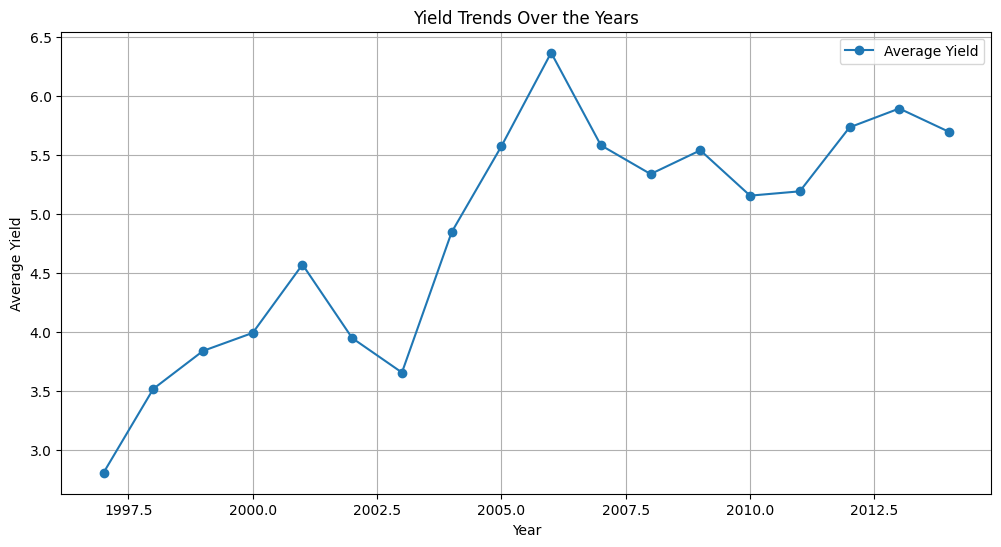


Decision Matrix:
                  Metric     Value
0          Reference LAI  3.808073
1             Target LAI  3.531612
2        Reference Yield  5.697131
3  Predicted Yield (Avg)  5.283526
4            Lower Bound  4.755174
5            Upper Bound  5.811879


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def get_average_yield(dataset, state, district, crop):
    filtered_data = dataset[
        (dataset["State_Name"] == state) &
        (dataset["District_Name"] == district) &
        (dataset["Crop"] == crop)
    ]


    if filtered_data.empty:
        raise ValueError(f"No data found for {crop} in {state}, {district} in the dataset.")


    latest_year = filtered_data["Crop_Year"].max()
    latest_year_data = filtered_data[filtered_data["Crop_Year"] == latest_year]

    if latest_year_data.empty:
        raise ValueError(f"No data found for {crop} in {state}, {district} in the latest available year ({latest_year}).")

    # latest_year_data["Yield"] = latest_year_data["Production"] / (latest_year_data["Area"] + 1e-6)
    latest_year_data.loc[:, "Yield"] = latest_year_data["Production"] / (latest_year_data["Area"] + 1e-6)
    average_yield = latest_year_data["Yield"].mean()

    print(f"Average Yield for {crop} in {state}, {district} in {latest_year}: {average_yield:.4f}")
    return average_yield


def estimate_yield_range(reference_lai, reference_yield, target_lai):

    scaling_factor = target_lai / reference_lai
    estimated_yield = reference_yield * scaling_factor

    lower_bound = estimated_yield * 0.9
    upper_bound = estimated_yield * 1.1

    print(f"Reference LAI: {reference_lai:.4f}, Reference Yield: {reference_yield:.4f}")
    print(f"Target LAI: {target_lai:.4f}")
    print(f"Estimated Yield Range: {lower_bound:.4f} - {upper_bound:.4f}")

    return lower_bound, upper_bound


def plot_yield_trends(dataset, state, district, crop):
    filtered_data = dataset[
        (dataset["State_Name"] == state) &
        (dataset["District_Name"] == district) &
        (dataset["Crop"] == crop)
    ]

    plt.figure(figsize=(12, 6))
    avg_yield = filtered_data.groupby("Crop_Year").apply(
        lambda x: (x["Production"] / (x["Area"] + 1e-6)).mean()
    )

    plt.plot(avg_yield.index, avg_yield.values, marker='o', label="Average Yield")
    plt.title("Yield Trends Over the Years")
    plt.xlabel("Year")
    plt.ylabel("Average Yield")
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    dataset_path = image_paths["dataset"]
    dataset = pd.read_csv(dataset_path)

    state = "Andhra Pradesh"
    district = "EAST GODAVARI"

    try:
        reference_yield = get_average_yield(dataset, state, district, predicted_crop)
    except ValueError as e:
        print(f"Error: {e}")
        exit()

    reference_image_path = image_paths["reference_image"]
    target_image_path = image_paths["uploaded_image"]

    reference_lai = predict_lai(reference_image_path, best_model)
    target_lai = predict_lai(target_image_path, best_model)

    yield_range = estimate_yield_range(reference_lai, reference_yield, target_lai)
    print(f"Final Yield Range for Target Image: {yield_range[0]:.4f} - {yield_range[1]:.4f}")

    plot_yield_trends(dataset, state, district, predicted_crop)

    decision_matrix = pd.DataFrame({
        "Metric": ["Reference LAI", "Target LAI", "Reference Yield", "Predicted Yield (Avg)", "Lower Bound", "Upper Bound"],
        "Value": [
            reference_lai, target_lai, reference_yield,
            (yield_range[0] + yield_range[1]) / 2,
            yield_range[0], yield_range[1]
        ]
    })

    print("\nDecision Matrix:")
    print(decision_matrix)